# Differential expression analysis


You have now successfully run the pipeline and checked the first quality control metrics of your fastq files. However, this is only primary analysis.

We would now like to understand exactly the difference between our groups of mice. 

Which pipeline would you use for this?


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [99]:
data=pd.read_excel('/Users/jansteiger/Documents/Comp_workflows/day2/conditions_runs_oxy_project.xlsx')
data.rename(columns={'Run': 'Sample'}, inplace=True)
data['condition: Sal']=data['condition: Sal'].notna()
data['Genotype: SNI']=data['Genotype: SNI'].notna()
data['condition'] = np.where(data['condition: Sal'] == True, 'Sal', 'oxy')
data['genotype'] = np.where(data['Genotype: SNI'] == True, 'SNI', 'Sham')
data=data[['Sample', 'condition', 'genotype']]
data

,Sample,condition,genotype
0,SRR23195505,Sal,SNI
1,SRR23195506,oxy,Sham
2,SRR23195507,Sal,Sham
3,SRR23195508,oxy,SNI
4,SRR23195509,oxy,SNI
5,SRR23195510,Sal,SNI
6,SRR23195511,oxy,Sham
7,SRR23195512,Sal,Sham
8,SRR23195513,Sal,SNI
9,SRR23195514,oxy,Sham


In [100]:
sorted_data = data.sort_values(by=['condition', 'genotype'])
sorted_data['names'] = sorted_data['genotype'] + '_' + sorted_data['condition']
sorted_data['replicate'] = sorted_data.groupby('names').cumcount() + 1
sorted_data['sample'] = sorted_data['names'] + '_' + sorted_data['replicate'].astype(str)
sample_sheet = sorted_data[['sample','condition', 'genotype', 'names', 'replicate']]
sample_sheet.to_csv('samplesheet.csv', header = True, index = False)
sorted_data


,Sample,condition,genotype,names,replicate,sample
0,SRR23195505,Sal,SNI,SNI_Sal,1,SNI_Sal_1
5,SRR23195510,Sal,SNI,SNI_Sal,2,SNI_Sal_2
8,SRR23195513,Sal,SNI,SNI_Sal,3,SNI_Sal_3
13,SRR23195518,Sal,SNI,SNI_Sal,4,SNI_Sal_4
2,SRR23195507,Sal,Sham,Sham_Sal,1,Sham_Sal_1
7,SRR23195512,Sal,Sham,Sham_Sal,2,Sham_Sal_2
10,SRR23195515,Sal,Sham,Sham_Sal,3,Sham_Sal_3
15,SRR23195520,Sal,Sham,Sham_Sal,4,Sham_Sal_4
3,SRR23195508,oxy,SNI,SNI_oxy,1,SNI_oxy_1
4,SRR23195509,oxy,SNI,SNI_oxy,2,SNI_oxy_2


In [69]:
contrast_sheet = pd.DataFrame()
contrast_sheet['id'] = ['sham_sal_vs_sham_oxy', 'sham_sal_vs_sni_oxy', 'sham_sal_vs_sni_sal', 'sni_oxy_vs_sni_sal']
contrast_sheet['variable'] = ['names', 'names', 'names', 'names']
contrast_sheet['reference'] = ['Sham_Sal', 'Sham_Sal', 'Sham_Sal', 'SNI_Sal']
contrast_sheet['target'] = ['Sham_oxy', 'SNI_oxy', 'SNI_Sal', 'SNI_oxy']
contrast_sheet.to_csv('contrasts.csv', header = True, index = False)

### Please paste here the command you used

In [70]:
# post here the command you used to run nf-core/rnaseq
!nextflow run nf-core/differentialabundance -profile rnaseq,docker --input samplesheet.csv --contrasts contrasts.csv --outdir abundance_analysis --matrix salmon.merged.gene_counts.tsv

Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.0
Launching `https://github.com/nf-core/differentialabundance` [intergalactic_faraday] DSL2 - revision: 3dd360fed0 [master]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : master
  runName                     : intergalactic_faraday
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1

### Explain all the parameters you set and why you set them in this way.


-profile: As before to use docker   
--input: The samplesheet containing the samples and respective conditions  
--outdir: Save directory  
--contrasts: Specify the specific conditions to compare  
--matrix: Matrix for the gene counts for each sample


### How did the pipeline perform?

19 tasks succeeded in 5m12s

### Would you exclude any samples? If yes, which and why?

When we just compare the four groups, the data seems to be fine and we don't have to exclude any.
When comparing by condition or by genotype, we see some outliers for the earlier mentioned samples (MAD scores). This is supported in the original PCA and dendrogram (when using the subgroups).
I would mention to the biologists possible contamination in SNI_Sal_2 and SNI_Sal_4 and low read counts for Sham_oxy_1, resulting in some skew in the results, and provide an alternative analysis without those samples.

### How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

Sham_oxy vs Sham_Sal: 8 up
SNI_oxy vs Sham_Sal: 1 up, 1 down
SNI_Sal vs Sham_Sal: 72 up, 1 down
SNI_oxy vs SNI_Sal: 1 up, 24 down

No, the paper also differentiates between the are where the tissue was collected and thus they receive different numbers. Their numbers are not even in the same dimension or proportions as ours so we cannot confirm their findings.  
Also, our analysis found no differential expression for the genes they mentioned.

### The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

NAc: Nucleus accumbens, part of reward circuitry affected by chronic pain states

mPFC: Medial prefrontal cortex, gene expression adaptation in response to peripheral nerve injury and antidepressant drug treatment under nerve injury states

VTA: Ventral tegmental area, also part of the reward circuitry

### Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

No, they pooled the samples from different regions before library preperation.

### Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

I would communicate at least the differentially expressed genes between conditions and genotypes as well as the difference in expression and p-value.

### Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

/Users/jansteiger/miniconda3/envs/test_env/lib/python3.10/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


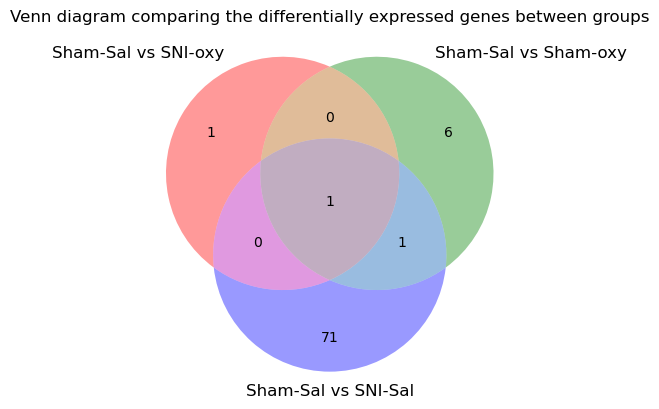

In [97]:
from matplotlib_venn import venn3_unweighted
data1 = pd.read_csv('/Users/jansteiger/Documents/Comp_workflows/day3/abundance_analysis/tables/differential/sham_sal_vs_sni_oxy.deseq2.results_filtered.tsv', sep = '\t')
data2 = pd.read_csv('/Users/jansteiger/Documents/Comp_workflows/day3/abundance_analysis/tables/differential/sham_sal_vs_sham_oxy.deseq2.results_filtered.tsv', sep = '\t')
data3 = pd.read_csv('/Users/jansteiger/Documents/Comp_workflows/day3/abundance_analysis/tables/differential/sham_sal_vs_sni_sal.deseq2.results_filtered.tsv', sep = '\t')

set1 = set(data1['gene_id'])
set2 = set(data2['gene_id'])
set3 = set(data3['gene_id'])

venn3_unweighted([set1, set2, set3], ('Sham-Sal vs SNI-oxy', 'Sham-Sal vs Sham-oxy', 'Sham-Sal vs SNI-Sal'))

plt.title('Venn diagram comparing the differentially expressed genes between groups')
plt.show()